In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [2]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Buket
[nltk_data]     Fildisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
stop_words.extend(['greenstoneplus','Source','Resources','Links'])

In [5]:
df= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/ExecutiveSumPfs_Parag.xlsx')
df.head()

Unnamed: 0       Date  Sent_Nmbr  \
0         0.0 2020-04-01         28   
1         1.0 2020-04-01         25   
2         2.0 2018-04-01         27   
3         3.0 2018-04-01         12   
4         4.0 2017-10-01         26   

                                             Context  
0  x international monetary fund | april 2020 exe...  
1   international monetary fund | april 2020 xito...  
2   international monetary fund | april 2018 xith...  
3  xii international monetary fund | april 2018 g...  
4  x international monetary fund | october 2017 n...

In [6]:
len(df)

164

In [7]:
df=df.drop(df.columns[0], axis=1)
df

Date  Sent_Nmbr                                            Context
0   2020-04-01         28  x international monetary fund | april 2020 exe...
1   2020-04-01         25   international monetary fund | april 2020 xito...
2   2018-04-01         27   international monetary fund | april 2018 xith...
3   2018-04-01         12  xii international monetary fund | april 2018 g...
4   2017-10-01         26  x international monetary fund | october 2017 n...
..         ...        ...                                                ...
159 2009-04-01         20  setting the stage for a more robust global fin...
160 2009-04-01         27    executive summary border and cross-functiona...
161 2009-04-01         23    executive summary to valuation reserves or a...
162 2009-04-01         10    executive summary settle across borders and ...
163        NaT       3480                                                NaN

[164 rows x 3 columns]

In [8]:
df=df.dropna().reset_index()
len(df)

163

In [9]:
df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
df

index       Date  Sent_Nmbr  \
0        0 2020-04-01         28   
1        1 2020-04-01         25   
2        2 2018-04-01         27   
3        3 2018-04-01         12   
4        4 2017-10-01         26   
..     ...        ...        ...   
158    158 2009-04-01         24   
159    159 2009-04-01         20   
160    160 2009-04-01         27   
161    161 2009-04-01         23   
162    162 2009-04-01         10   

                                               Context  
0    x international monetary fund | april 2020 exe...  
1    international monetary fund | april 2020 xito ...  
2    international monetary fund | april 2018 xithe...  
3    xii international monetary fund | april 2018 g...  
4    x international monetary fund | october 2017 n...  
..                                                 ...  
158  executive summary promote fiscal financial pol...  
159  setting stage robust global financial system i...  
160  executive summary border cross-functional regu...  
161  executive summary valuation reserves adjustmen...  
162  executive summary settle across borders multip...  

[163 rows x 4 columns]

In [10]:
df_list=df["Context"].values.tolist()
df_list

['x international monetary fund | april 2020 executive summary coronavirus (covid-19) pandemic presents historic challenge. mid-february, market participants started fear outbreak would become global pandemic, prices equities fell sharply, previously overstretched levels. credit markets, spreads skyrocketed, especially risky segments high-yield bonds, leveraged loans, private debt, issuance essentially came halt. oil prices plummeted face weakening global demand failure opec+ countries reach agreement output cuts, adding leg deterioration risk appetite. volatile market conditions led flight quality, yields safe-haven bonds declining abruptly. number factors amplified asset price moves, contributing sharp tightening financial conditions unprecedented speed. signs strain emerged major short-term funding markets, including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago. market liquidity deteriorated considerably, including markets traditi

In [11]:
import string
import re
def text_clean_1(text):
    text = text.lower()
    text= text.replace(".  ",".");
    text= text.replace("'  ',","");
    text= text.replace(" '","'");
    text= text.replace("  ","");
    text= text.replace("•","");
    text=re.sub('\[\' ','',text)
    text=re.sub('\[\'','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [12]:
text_clean_1(df_list[3])

'xii international monetary fund  april 2018 global financial stability report bumpy road aheadthe technology behind crypto assets potential make financial market infrastructure efficient however crypto assets afflicted fraud security breaches operational failures associated illicit activities present crypto assets appear pose financial stability risks could use become widespread without appropriate safeguards chapter 2 takes comprehensive look evolution riskiness corporate credit allocation given concerns continued search higher yield may led banks investors extend much credit risky borrowers chapter documents pattern firms obtaining credit relatively riskier periods strong credit expansion especially lending standards loose financial conditions easy increase riskiness credit allocation signals heightened downside risks gdp growth higher probability banking stress addition previously documented signals provided credit growth country authorities use measures introduced chapter monitor 

In [13]:
len(df_list)

163

In [14]:
doc=[]
for i in range(len(df_list)):
    doc.append(text_clean_1(df_list[i]))
doc


['x international monetary fund  april 2020 executive summary coronavirus covid19 pandemic presents historic challenge midfebruary market participants started fear outbreak would become global pandemic prices equities fell sharply previously overstretched levels credit markets spreads skyrocketed especially risky segments highyield bonds leveraged loans private debt issuance essentially came halt oil prices plummeted face weakening global demand failure opec countries reach agreement output cuts adding leg deterioration risk appetite volatile market conditions led flight quality yields safehaven bonds declining abruptly number factors amplified asset price moves contributing sharp tightening financial conditions unprecedented speed signs strain emerged major shortterm funding markets including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago market liquidity deteriorated considerably including markets traditionally seen deep leveraged in

In [15]:
type(doc)

list

In [16]:
doc[1]

'international monetary fund  april 2020 xito end authorities across globe already implemented wideranging policies april 2020 fiscal monitor describes fiscal support packages announced governments across globe large timely temporary targeted fiscal measures necessary ensure temporary shutdown activity lead permanent damage productive capacity economy society whole central banks globally taken bold decisive actions easing monetary policy purchasing range assets providing liquidity financial system effort lean tightening financial conditions maintain flow credit economy policy rates near zero many major advanced economies unconventional measures forward guidance expected policy path becoming main tools central banks going forward central banks may also consider measures support economy challenging times policymakers need maintain balance safeguarding financial stability supporting economic activity banks first instance banks’ existing capital liquidity buffers used absorb losses funding

In [17]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
sentences=[]
tokenized_sentences=[]
for i in range(len(df)):
    print(i)
    sentences.append(sent_tokenize(doc[i]))
    for sentence in sentences[i]:
        tokenized_sentences.append(word_tokenize(sentence.lower()))
sentences

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


[['x international monetary fund  april 2020 executive summary coronavirus covid19 pandemic presents historic challenge midfebruary market participants started fear outbreak would become global pandemic prices equities fell sharply previously overstretched levels credit markets spreads skyrocketed especially risky segments highyield bonds leveraged loans private debt issuance essentially came halt oil prices plummeted face weakening global demand failure opec countries reach agreement output cuts adding leg deterioration risk appetite volatile market conditions led flight quality yields safehaven bonds declining abruptly number factors amplified asset price moves contributing sharp tightening financial conditions unprecedented speed signs strain emerged major shortterm funding markets including global market us dollars—a development reminiscent dynamics last seen financial crisis decade ago market liquidity deteriorated considerably including markets traditionally seen deep leveraged i

In [18]:
print(tokenized_sentences)
print(sentences)

[['x', 'international', 'monetary', 'fund', 'april', '2020', 'executive', 'summary', 'coronavirus', 'covid19', 'pandemic', 'presents', 'historic', 'challenge', 'midfebruary', 'market', 'participants', 'started', 'fear', 'outbreak', 'would', 'become', 'global', 'pandemic', 'prices', 'equities', 'fell', 'sharply', 'previously', 'overstretched', 'levels', 'credit', 'markets', 'spreads', 'skyrocketed', 'especially', 'risky', 'segments', 'highyield', 'bonds', 'leveraged', 'loans', 'private', 'debt', 'issuance', 'essentially', 'came', 'halt', 'oil', 'prices', 'plummeted', 'face', 'weakening', 'global', 'demand', 'failure', 'opec', 'countries', 'reach', 'agreement', 'output', 'cuts', 'adding', 'leg', 'deterioration', 'risk', 'appetite', 'volatile', 'market', 'conditions', 'led', 'flight', 'quality', 'yields', 'safehaven', 'bonds', 'declining', 'abruptly', 'number', 'factors', 'amplified', 'asset', 'price', 'moves', 'contributing', 'sharp', 'tightening', 'financial', 'conditions', 'unprecedent

In [19]:
# Create bigram model
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Create bigram model
bigram = Phrases(tokenized_sentences, min_count=2, threshold=50)
bigram_mod = Phraser(bigram)

# Apply the bigram model to the tokenized sentences
bigram_sentences = [bigram_mod[sentence] for sentence in tokenized_sentences]
bigram_sentences

[['x_international',
  'monetary_fund',
  'april',
  '2020',
  'executive_summary',
  'coronavirus',
  'covid19',
  'pandemic',
  'presents',
  'historic',
  'challenge',
  'midfebruary',
  'market_participants',
  'started',
  'fear',
  'outbreak',
  'would',
  'become',
  'global',
  'pandemic',
  'prices',
  'equities',
  'fell',
  'sharply',
  'previously',
  'overstretched',
  'levels',
  'credit',
  'markets',
  'spreads',
  'skyrocketed',
  'especially',
  'risky',
  'segments',
  'highyield',
  'bonds',
  'leveraged',
  'loans',
  'private',
  'debt',
  'issuance',
  'essentially',
  'came',
  'halt',
  'oil_prices',
  'plummeted',
  'face',
  'weakening',
  'global',
  'demand',
  'failure',
  'opec',
  'countries',
  'reach',
  'agreement',
  'output',
  'cuts',
  'adding',
  'leg',
  'deterioration',
  'risk_appetite',
  'volatile',
  'market',
  'conditions',
  'led',
  'flight',
  'quality',
  'yields',
  'safehaven',
  'bonds',
  'declining',
  'abruptly',
  'number',
  '

In [20]:
# Generate trigram model
trigram = Phrases(bigram_sentences, min_count=2, threshold=10)
trigram_mod = Phraser(trigram)

# Apply trigram model to the bigram-transformed sentences
trigram_sentences = [trigram_mod[sentence] for sentence in bigram_sentences]

In [21]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [22]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_bigram = lemmatization(bigram_sentences, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized_bigram

[['executive_summary',
  'coronavirus',
  'covid19',
  'present',
  'historic',
  'challenge',
  'midfebruary',
  'market_participant',
  'start',
  'fear',
  'outbreak',
  'become',
  'global',
  'pandemic',
  'price',
  'equity',
  'fall',
  'sharply',
  'previously',
  'overstretch',
  'level',
  'credit',
  'market',
  'spread',
  'skyrocket',
  'especially',
  'risky',
  'segment',
  'highyield',
  'bond',
  'leverage',
  'loan',
  'private',
  'debt',
  'issuance',
  'essentially',
  'come',
  'halt',
  'plummet',
  'face',
  'weaken',
  'global',
  'demand',
  'failure',
  'opec',
  'country',
  'reach',
  'agreement',
  'output',
  'cut',
  'add',
  'leg',
  'deterioration',
  'risk_appetite',
  'volatile',
  'market',
  'condition',
  'lead',
  'flight',
  'quality',
  'yield',
  'safehaven',
  'bond',
  'decline',
  'abruptly',
  'number',
  'factor',
  'amplify',
  'asset_price',
  'move',
  'contribute',
  'sharp_tightene',
  'financial',
  'condition',
  'unprecedented',
 

In [23]:
data_lemmatized_trigram = lemmatization(trigram_sentences, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized_trigram

[['monetary_fund_april',
  'executive_summary',
  'coronavirus',
  'covid19',
  'present',
  'historic',
  'challenge',
  'midfebruary',
  'market_participant',
  'start',
  'fear',
  'outbreak',
  'become',
  'global',
  'pandemic',
  'price',
  'equity',
  'fall',
  'sharply',
  'previously',
  'overstretch',
  'level',
  'credit',
  'market',
  'spread',
  'skyrocket',
  'especially',
  'risky',
  'segment',
  'highyield',
  'bond',
  'leverage',
  'loan',
  'private',
  'debt_issuance',
  'essentially',
  'come',
  'halt',
  'plummet',
  'face',
  'weaken',
  'global',
  'demand',
  'failure',
  'opec',
  'country',
  'reach',
  'agreement',
  'output',
  'cut',
  'add',
  'leg',
  'deterioration',
  'risk_appetite',
  'volatile',
  'market',
  'condition',
  'lead',
  'flight',
  'quality',
  'yield',
  'safehaven',
  'bond',
  'decline',
  'abruptly',
  'number',
  'factor',
  'amplify',
  'asset_price',
  'move',
  'contribute',
  'sharp_tightening_financial',
  'condition',
  '

In [24]:
data_read=[]
for i in range(len(data_lemmatized_bigram)):
    data_read.append(" ".join(data_lemmatized_bigram[i]))
data_read

['executive_summary coronavirus covid19 present historic challenge midfebruary market_participant start fear outbreak become global pandemic price equity fall sharply previously overstretch level credit market spread skyrocket especially risky segment highyield bond leverage loan private debt issuance essentially come halt plummet face weaken global demand failure opec country reach agreement output cut add leg deterioration risk_appetite volatile market condition lead flight quality yield safehaven bond decline abruptly number factor amplify asset_price move contribute sharp_tightene financial condition unprecedented speed sign strain emerge major shortterm funding market include global market dollar development reminiscent dynamic last see financial crisis decade ago market liquidity deteriorate considerably include market traditionally see deep leveraged investor come pressure reportedly force close position order meet margin call rebalance portfolio however market pare loss decisiv

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import LdaModel
from gensim import corpora

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Vectorizer
tfidf_vectorizer=TfidfVectorizer()
dtm_tfidf= tfidf_vectorizer.fit_transform(data_read) 
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(data_read)  # Document-term matrix
feature_names = vectorizer.get_feature_names_out()
gensim_corpus_tfidf = [
    [(i, freq) for i, freq in zip(dtm_tfidf[doc_idx].indices, dtm_tfidf[doc_idx].data)]
    for doc_idx in range(dtm_tfidf.shape[0])
]
gensim_dictionary_tfidf = corpora.Dictionary([feature_names_tfidf])

# Step 2: Convert to Gensim's format (corpus and dictionary)
gensim_corpus = [
    [(i, freq) for i, freq in zip(dtm[doc_idx].indices, dtm[doc_idx].data)]
    for doc_idx in range(dtm.shape[0])
]
gensim_dictionary = corpora.Dictionary([feature_names])



In [27]:
# Step 3: Train the LDA model
lda_tfidf = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus_tfidf, num_topics=10, id2word=gensim_dictionary_tfidf,  random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
lda = gensim.models.ldamodel.LdaModel(corpus=gensim_corpus, num_topics=10, id2word=gensim_dictionary,  random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [28]:
# Step 4: Display the dominant topic words for each document
for doc_idx, bow in enumerate(gensim_corpus):
    #print(doc_idx)
    doc_topics = lda.get_document_topics(bow, minimum_probability=0.0)
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  # Topic with the highest probability
    topic_words = lda.show_topic(dominant_topic, topn=10)  # Top words for the topic
    topic_words_str = " ".join([word for word, prob in topic_words])
    print(f"Document {doc_idx}: Dominant Topic Words - {topic_words_str}")

Document 0: Dominant Topic Words - financial market global emerge condition sector economy rise risk growth
Document 1: Dominant Topic Words - market risk financial bank need policy credit liquidity institution global
Document 2: Dominant Topic Words - market risk financial bank need policy credit liquidity institution global
Document 3: Dominant Topic Words - market risk financial bank need policy credit liquidity institution global
Document 4: Dominant Topic Words - market risk financial bank need policy credit liquidity institution global
Document 5: Dominant Topic Words - market risk financial bank need policy credit liquidity institution global
Document 6: Dominant Topic Words - market risk financial bank need policy credit liquidity institution global
Document 7: Dominant Topic Words - market risk financial bank need policy credit liquidity institution global
Document 8: Dominant Topic Words - financial market global emerge condition sector economy rise risk growth
Document 9: Do

In [29]:
# Step 4: Display the dominant topic words for each document
for doc_idx, bow in enumerate(gensim_corpus_tfidf):
    #print(doc_idx)
    doc_topics = lda_tfidf.get_document_topics(bow, minimum_probability=0.0)
    dominant_topic = max(doc_topics, key=lambda x: x[1])[0]  # Topic with the highest probability
    topic_words = lda.show_topic(dominant_topic, topn=10)  # Top words for the topic
    topic_words_str = " ".join([word for word, prob in topic_words])
    print(f"Document {doc_idx}: Dominant Topic Words - {topic_words_str}")

Document 0: Dominant Topic Words - large_midsize crypto_asset quartile sp_capital officer median sustainable_inclusive rationalize tailor percentage_point
Document 1: Dominant Topic Words - large_midsize crypto_asset quartile sp_capital officer median sustainable_inclusive rationalize tailor percentage_point
Document 2: Dominant Topic Words - large_midsize crypto_asset quartile sp_capital officer median sustainable_inclusive rationalize tailor percentage_point
Document 3: Dominant Topic Words - large_midsize crypto_asset quartile sp_capital officer median sustainable_inclusive rationalize tailor percentage_point
Document 4: Dominant Topic Words - large_midsize crypto_asset quartile sp_capital officer median sustainable_inclusive rationalize tailor percentage_point
Document 5: Dominant Topic Words - large_midsize crypto_asset quartile sp_capital officer median sustainable_inclusive rationalize tailor percentage_point
Document 6: Dominant Topic Words - large_midsize crypto_asset quartile

In [30]:
# Compute Perplexity
print('\nPerplexity: ', lda_tfidf.log_perplexity(gensim_corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_tfidf, texts=[doc.split() for doc in data_read], dictionary=gensim_dictionary_tfidf, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
# Compute Perplexity
perplexity_score = lda_tfidf.log_perplexity(gensim_corpus_tfidf)

# Compute Topic Diversity
num_topics = lda_tfidf.num_topics
top_words_per_topic = []
n_top_words = 10

for t in range(num_topics):
    top_words = [word for word, prob in lda_tfidf.show_topic(t, topn=n_top_words)]
    top_words_per_topic.extend(top_words)

unique_words = set(top_words_per_topic)
total_words = len(top_words_per_topic)
topic_diversity = len(unique_words) / total_words

print(f"Perplexity: {perplexity_score}")
print(f"Topic Diversity: {topic_diversity}")


Perplexity:  -10.913931835397971

Coherence Score:  0.5312743612005226
Perplexity: -10.913931560408958
Topic Diversity: 0.97


In [31]:
# Create Dictionary
id2word_bigram = corpora.Dictionary(data_lemmatized_bigram)
id2word_trigram = corpora.Dictionary(data_lemmatized_trigram)
# Create Corpus
texts_bigram = data_lemmatized_bigram
texts_trigram = data_lemmatized_trigram
# Term Document Frequency
corpus_bigram = [id2word_bigram.doc2bow(text_b) for text_b in texts_bigram]
corpus_trigram = [id2word_trigram.doc2bow(text_t) for text_t in texts_trigram]
# View
#print(corpus[:1])

In [32]:
lda_model_bigram = gensim.models.ldamodel.LdaModel(corpus=corpus_bigram,
                                           id2word=id2word_bigram,
                                           num_topics=32,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [33]:
lda_model_trigram = gensim.models.ldamodel.LdaModel(corpus=corpus_trigram,
                                           id2word=id2word_trigram,
                                           num_topics=32,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [34]:
# Print the Keyword in the 10 topics
print(lda_model_bigram.print_topics())
doc_lda = lda_model[corpus_bigram]

[(25, '0.000*"global" + 0.000*"fund" + 0.000*"climate" + 0.000*"support" + 0.000*"change" + 0.000*"financial" + 0.000*"economy" + 0.000*"flow" + 0.000*"sustainable" + 0.000*"continue"'), (4, '0.000*"financial" + 0.000*"growth" + 0.000*"risk" + 0.000*"policy" + 0.000*"market" + 0.000*"global" + 0.000*"economy" + 0.000*"continue" + 0.000*"debt" + 0.000*"credit"'), (14, '0.000*"financial" + 0.000*"market" + 0.000*"global" + 0.000*"low" + 0.000*"remain" + 0.000*"bank" + 0.000*"risk" + 0.000*"credit" + 0.000*"investor" + 0.000*"policy"'), (24, '0.000*"financial" + 0.000*"market" + 0.000*"global" + 0.000*"sector" + 0.000*"remain" + 0.000*"continue" + 0.000*"policy" + 0.000*"bank" + 0.000*"low" + 0.000*"equity"'), (10, '0.000*"market" + 0.000*"risk" + 0.000*"financial" + 0.000*"growth" + 0.000*"emerge" + 0.000*"vulnerability" + 0.000*"increase" + 0.000*"policy" + 0.000*"global" + 0.000*"economy"'), (5, '0.000*"financial" + 0.000*"market" + 0.000*"risk" + 0.000*"global" + 0.000*"bank" + 0.000*

NameError: name 'lda_model' is not defined

In [35]:
len(lda_model_trigram.print_topics())

20

In [52]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_bigram.log_perplexity(corpus_bigram))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_bigram, texts=[doc.split() for doc in data_read], dictionary=id2word_bigram, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
# Compute Perplexity
perplexity_score = lda_model_bigram.log_perplexity(corpus_bigram)

# Compute Topic Diversity
num_topics = lda_model_bigram.num_topics
top_words_per_topic = []
n_top_words = 10

for t in range(num_topics):
    top_words = [word for word, prob in lda_model_bigram.show_topic(t, topn=n_top_words)]
    top_words_per_topic.extend(top_words)

unique_words = set(top_words_per_topic)
total_words = len(top_words_per_topic)
topic_diversity = len(unique_words) / total_words

print(f"Perplexity: {perplexity_score}")
print(f"Topic Diversity: {topic_diversity}")


Perplexity:  -9.146281057284357

Coherence Score:  0.37146752045885695
Perplexity: -9.146273486157252
Topic Diversity: 0.490625


In [53]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
vis

NameError: name 'corpus' is not defined

In [34]:
#How to find optimal number of topic


In [ ]:
# Get the top 5 topics for each document, including topic keywords
import statistics
import numpy as np

topic_keywords_list=[]
top_5_topics=[]
test=0
for i, doc in enumerate(gensim_corpus_tfidf):
    # Get topic distribution for the document, including low-probability topics
    doc_topics = lda_tfidf.get_document_topics(doc)#, minimum_probability=0.3)
    # Sort the topics by their contribution to the document in descending order
    sorted_doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    # Get exactly the top 5 topics for the document
    top_5_topics=sorted_doc_topics[:10]
     
    print(f"\nDocument {i+1} top 34 topics:")    
    print(test)
    for topic_id, prob in top_5_topics:        
        # Get the keywords for each topic
        topic_keywords=lda_tfidf.print_topic(topic_id)#, topn=34)
        print(f"Topic {topic_id} : Probability={prob:.4f}, Keywords={topic_keywords}")
        topic_keywords_list.append(topic_keywords)   

In [ ]:
print(len(topic_keywords_list))
topic_keywords_list

In [ ]:
len(topic_keywords_list)

In [54]:
import re
topics=[]
for i in range(len(gensim_corpus_tfidf)):
    print(i)
 # Use regular expressions to find only the words
    words_only = re.findall(r'"\w+"', topic_keywords_list[i])
    # Remove the quotes around each word
    keywords = [word.strip('"') for word in words_only]
    print(keywords)
    topics.append(keywords)

0
['market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution']
1
['public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress']
2
['intervention', 'securitization', 'context', 'relevant', 'initiative', 'legal', 'weakness', 'counterpartie', 'prove', 'method']
3
['market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution']
4
['public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress']
5
['intervention', 'securitization', 'context', 'relevant', 'initiative', 'legal', 'weakness', 'counterpartie', 'prove', 'method']
6
['market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution']
7
['public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress']
8
['intervention', 'securitization', 'context', 're

In [55]:
# Create a DataFrame with each sublist as a cell in the 'Keywords' column
df = pd.DataFrame({'Document_Number': range(1, len(topics) + 1), 'Keywords': topics})

# Display the DataFrame
df

Document_Number                                           Keywords
0                  1  [market, financial, risk, bank, global, need, ...
1                  2  [public, information, euro_area, become, cross...
2                  3  [intervention, securitization, context, releva...
3                  4  [market, financial, risk, bank, global, need, ...
4                  5  [public, information, euro_area, become, cross...
..               ...                                                ...
158              159  [public, information, euro_area, become, cross...
159              160  [intervention, securitization, context, releva...
160              161  [market, financial, risk, bank, global, need, ...
161              162  [public, information, euro_area, become, cross...
162              163  [intervention, securitization, context, releva...

[163 rows x 2 columns]

In [56]:
df.to_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/Results/LAST RESULTS/Result_Article_TFIDFVectorizer_paragraph.xlsx')

In [57]:
d = df['Keywords'].tolist()
wordclouddeneme= ' '.join(map(str, d)) 
wordclouddeneme

"['market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution'] ['public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress'] ['intervention', 'securitization', 'context', 'relevant', 'initiative', 'legal', 'weakness', 'counterpartie', 'prove', 'method'] ['market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution'] ['public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress'] ['intervention', 'securitization', 'context', 'relevant', 'initiative', 'legal', 'weakness', 'counterpartie', 'prove', 'method'] ['market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution'] ['public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress'] ['intervention', 'securitization', 'context', 'relevant', 'initiat

In [58]:
wrds=[]
print(len(d))
for i in range(len(d)):
    for words in d[i]:
        wrds.append(words)
wrds


163


['market',
 'financial',
 'risk',
 'bank',
 'global',
 'need',
 'policy',
 'emerge',
 'credit',
 'institution',
 'public',
 'information',
 'euro_area',
 'become',
 'crossborder',
 'suggest',
 'approach',
 'several',
 'supervisor',
 'stress',
 'intervention',
 'securitization',
 'context',
 'relevant',
 'initiative',
 'legal',
 'weakness',
 'counterpartie',
 'prove',
 'method',
 'market',
 'financial',
 'risk',
 'bank',
 'global',
 'need',
 'policy',
 'emerge',
 'credit',
 'institution',
 'public',
 'information',
 'euro_area',
 'become',
 'crossborder',
 'suggest',
 'approach',
 'several',
 'supervisor',
 'stress',
 'intervention',
 'securitization',
 'context',
 'relevant',
 'initiative',
 'legal',
 'weakness',
 'counterpartie',
 'prove',
 'method',
 'market',
 'financial',
 'risk',
 'bank',
 'global',
 'need',
 'policy',
 'emerge',
 'credit',
 'institution',
 'public',
 'information',
 'euro_area',
 'become',
 'crossborder',
 'suggest',
 'approach',
 'several',
 'supervisor',
 'stre

In [59]:
wordclouddeneme= ' '.join(map(str, wrds)) 
wordclouddeneme

'market financial risk bank global need policy emerge credit institution public information euro_area become crossborder suggest approach several supervisor stress intervention securitization context relevant initiative legal weakness counterpartie prove method market financial risk bank global need policy emerge credit institution public information euro_area become crossborder suggest approach several supervisor stress intervention securitization context relevant initiative legal weakness counterpartie prove method market financial risk bank global need policy emerge credit institution public information euro_area become crossborder suggest approach several supervisor stress intervention securitization context relevant initiative legal weakness counterpartie prove method market financial risk bank global need policy emerge credit institution public information euro_area become crossborder suggest approach several supervisor stress intervention securitization context relevant initiati

In [60]:
from wordcloud import WordCloud, STOPWORDS

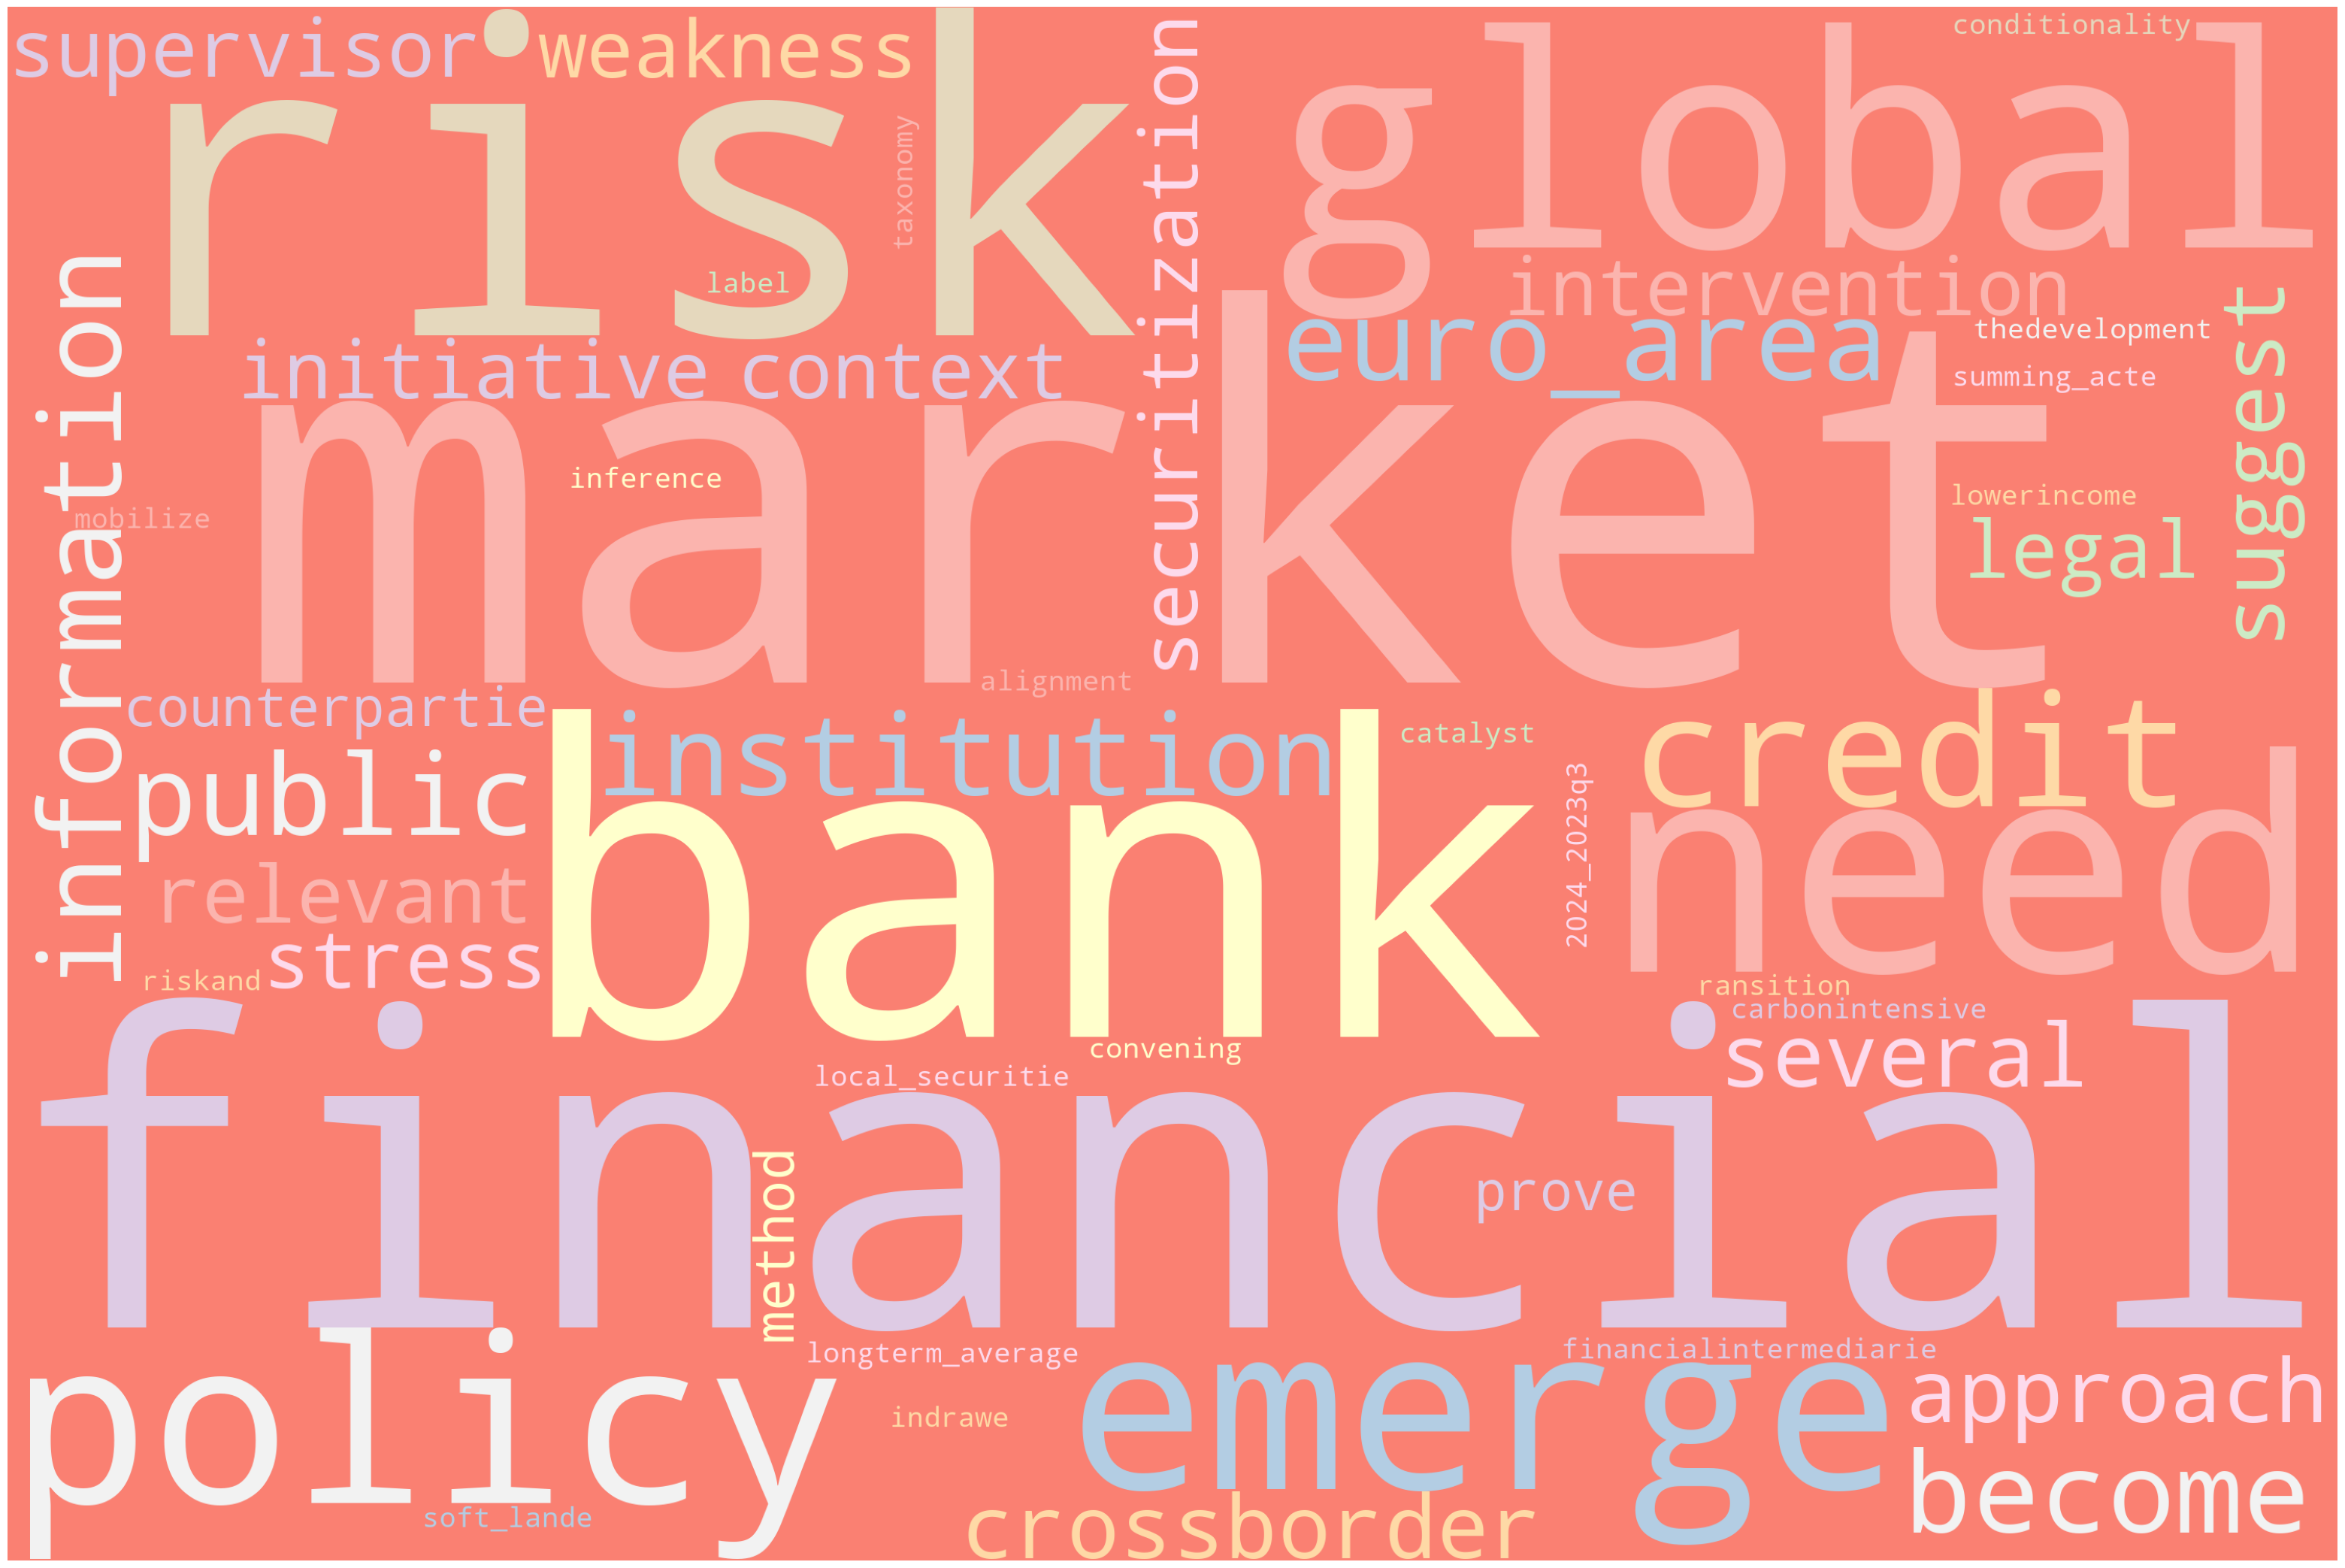

In [61]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Import package

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(wordclouddeneme)
# Plot
plot_cloud(wordcloud)

In [62]:
z=df['Keywords'].astype(str)
z

0      ['market', 'financial', 'risk', 'bank', 'globa...
1      ['public', 'information', 'euro_area', 'become...
2      ['intervention', 'securitization', 'context', ...
3      ['market', 'financial', 'risk', 'bank', 'globa...
4      ['public', 'information', 'euro_area', 'become...
                             ...                        
158    ['public', 'information', 'euro_area', 'become...
159    ['intervention', 'securitization', 'context', ...
160    ['market', 'financial', 'risk', 'bank', 'globa...
161    ['public', 'information', 'euro_area', 'become...
162    ['intervention', 'securitization', 'context', ...
Name: Keywords, Length: 163, dtype: object

In [63]:
df['Keywords'][1][1]

'information'

In [64]:
list=[]
for i in range(len(z)):
    for j in range(10):
        list.append(df['Keywords'][i][j])
list
    

['market',
 'financial',
 'risk',
 'bank',
 'global',
 'need',
 'policy',
 'emerge',
 'credit',
 'institution',
 'public',
 'information',
 'euro_area',
 'become',
 'crossborder',
 'suggest',
 'approach',
 'several',
 'supervisor',
 'stress',
 'intervention',
 'securitization',
 'context',
 'relevant',
 'initiative',
 'legal',
 'weakness',
 'counterpartie',
 'prove',
 'method',
 'market',
 'financial',
 'risk',
 'bank',
 'global',
 'need',
 'policy',
 'emerge',
 'credit',
 'institution',
 'public',
 'information',
 'euro_area',
 'become',
 'crossborder',
 'suggest',
 'approach',
 'several',
 'supervisor',
 'stress',
 'intervention',
 'securitization',
 'context',
 'relevant',
 'initiative',
 'legal',
 'weakness',
 'counterpartie',
 'prove',
 'method',
 'market',
 'financial',
 'risk',
 'bank',
 'global',
 'need',
 'policy',
 'emerge',
 'credit',
 'institution',
 'public',
 'information',
 'euro_area',
 'become',
 'crossborder',
 'suggest',
 'approach',
 'several',
 'supervisor',
 'stre

In [65]:
pd.Series(list)

0              market
1           financial
2                risk
3                bank
4              global
            ...      
1625            legal
1626         weakness
1627    counterpartie
1628            prove
1629           method
Length: 1630, dtype: object

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
y=pd.Series(list).apply(lambda x: x.split(', ') if isinstance(x, str) and x.strip() else [])
print(y)


0              [market]
1           [financial]
2                [risk]
3                [bank]
4              [global]
             ...       
1625            [legal]
1626         [weakness]
1627    [counterpartie]
1628            [prove]
1629           [method]
Length: 1630, dtype: object


In [67]:
keywords_list = [keyword for sublist in y for keyword in sublist]
print(keywords_list)
# Count the occurrences of each keyword
keyword_counts = pd.Series(keywords_list).value_counts()
type(keyword_counts)


['market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution', 'public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress', 'intervention', 'securitization', 'context', 'relevant', 'initiative', 'legal', 'weakness', 'counterpartie', 'prove', 'method', 'market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution', 'public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress', 'intervention', 'securitization', 'context', 'relevant', 'initiative', 'legal', 'weakness', 'counterpartie', 'prove', 'method', 'market', 'financial', 'risk', 'bank', 'global', 'need', 'policy', 'emerge', 'credit', 'institution', 'public', 'information', 'euro_area', 'become', 'crossborder', 'suggest', 'approach', 'several', 'supervisor', 'stress', 'intervention', 'securitization', 'context', 'relevant', 'initiative', 'le

pandas.core.series.Series

In [68]:
# Convert to DataFrame and reset index for Seaborn
word_df = keyword_counts.reset_index()
word_df.columns = ['word', 'count']

In [69]:
word_df

word  count
0                   market     53
1                 approach     53
2                   method     53
3                    prove     53
4            counterpartie     53
5                 weakness     53
6                financial     53
7               initiative     53
8                 relevant     53
9                  context     53
10          securitization     53
11            intervention     53
12                  stress     53
13              supervisor     53
14                 several     53
15                   legal     53
16                 suggest     53
17                  emerge     53
18             crossborder     53
19                    risk     53
20                    bank     53
21                    need     53
22                  policy     53
23                  global     53
24                  credit     53
25             institution     53
26                  public     53
27             information     53
28               euro_area     53
29                  become     53
30               alignment      2
31         carbonintensive      2
32               ransition      2
33               convening      2
34             lowerincome      2
35                catalyst      2
36                mobilize      2
37          conditionality      2
38                taxonomy      2
39             2024_2023q3      2
40            summing_acte      2
41               inference      2
42                 riskand      2
43                 indrawe      2
44  financialintermediarie      2
45          thedevelopment      2
46              soft_lande      2
47        longterm_average      2
48         local_securitie      2
49                   label      2

In [2]:
word_df.to_excel(r'C:\Users\Buket Fildisi\Desktop\BCU\Last Results_PHD\wordcountoftopics_EXECUTIVESUM_LDA.xlsx')

NameError: name 'word_df' is not defined

In [70]:
# Select the top 20 words
top_20_words = word_df.head(70)

In [71]:
# Filter words with count > 1
filtered_word_df = word_df[word_df['count'] >5]

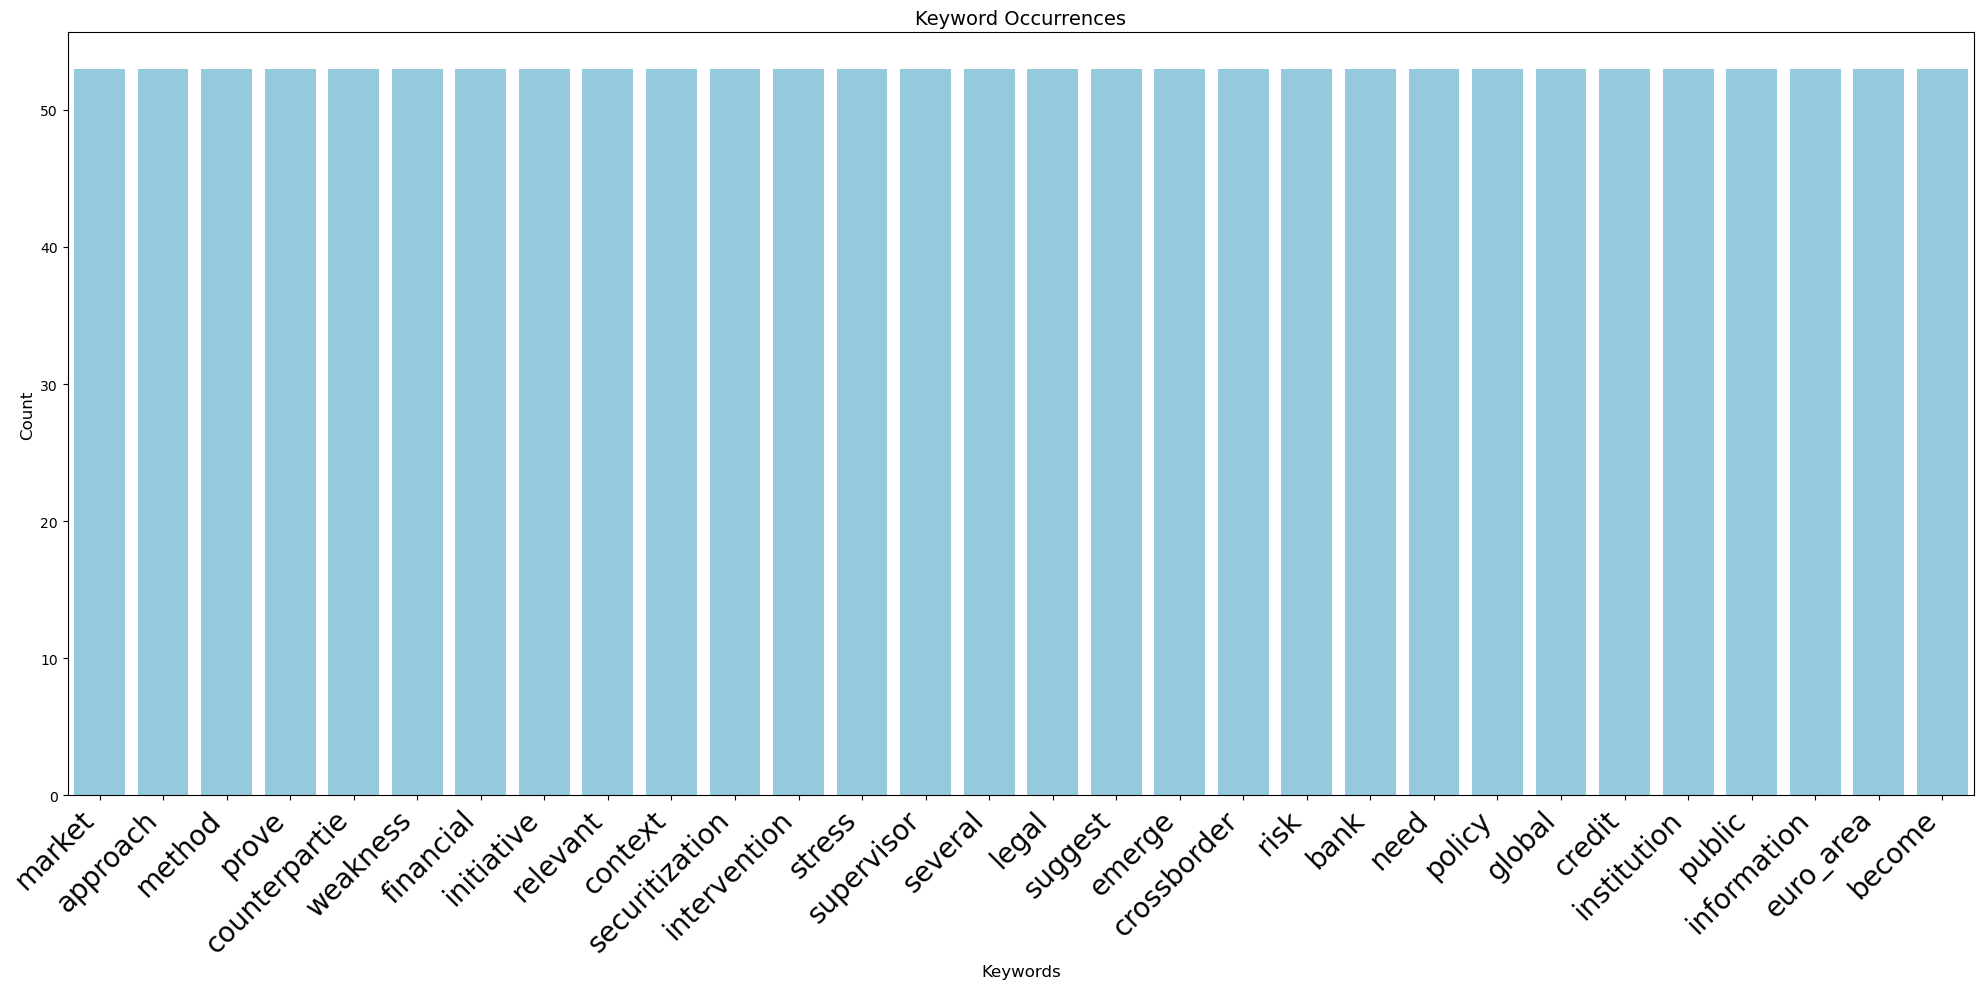

In [72]:
# Create a barplot
plt.figure(figsize=(20, 10))
sns.barplot(
    x='word', 
    y='count', 
    data=filtered_word_df, 
   # palette='coolwarm',
   # edgecolor='black'  # Adds a border for clarity
    color='skyblue'
)

# Customize plot
#plt.figure(figsize=(40, 30))
plt.title('Keyword Occurrences', fontsize=14)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [73]:
topics

[['market',
  'financial',
  'risk',
  'bank',
  'global',
  'need',
  'policy',
  'emerge',
  'credit',
  'institution'],
 ['public',
  'information',
  'euro_area',
  'become',
  'crossborder',
  'suggest',
  'approach',
  'several',
  'supervisor',
  'stress'],
 ['intervention',
  'securitization',
  'context',
  'relevant',
  'initiative',
  'legal',
  'weakness',
  'counterpartie',
  'prove',
  'method'],
 ['market',
  'financial',
  'risk',
  'bank',
  'global',
  'need',
  'policy',
  'emerge',
  'credit',
  'institution'],
 ['public',
  'information',
  'euro_area',
  'become',
  'crossborder',
  'suggest',
  'approach',
  'several',
  'supervisor',
  'stress'],
 ['intervention',
  'securitization',
  'context',
  'relevant',
  'initiative',
  'legal',
  'weakness',
  'counterpartie',
  'prove',
  'method'],
 ['market',
  'financial',
  'risk',
  'bank',
  'global',
  'need',
  'policy',
  'emerge',
  'credit',
  'institution'],
 ['public',
  'information',
  'euro_area',
  'be

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np
# Semantic Similarity
model = SentenceTransformer('all-MiniLM-L6-v2')  # Use a lightweight sentence transformer
topic_embeddings = [model.encode(" ".join(topic)) for topic in topics]
similarity_matrix = cosine_similarity(topic_embeddings)

# Mean Pairwise Similarity (Lower = More Diverse Topics)
mean_similarity = np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])

# Print Results
#print(f"Diversity Score: {diversity_score}")
print(f"Mean Semantic Similarity: {mean_similarity}")


Mean Semantic Similarity: 0.4730682075023651


In [76]:
topics[2]

['intervention',
 'securitization',
 'context',
 'relevant',
 'initiative',
 'legal',
 'weakness',
 'counterpartie',
 'prove',
 'method']